# Trabajo Práctico N°08 - Aprendizaje Automático No Supervisado
Aprendizaje Autatico (Machine Learning en ingles) se le llama a un conjunto de tecnicas utilizadas para extraer información a partir del análisis de datos automáticamente, usualmente, con el objetivo de poder realizar predicciones sobre datos no conocidos a priori. 
Las tecnicas de aprendizaje automatico estan divididas en de tres grandes grupos: 

* Aprendizaje Supervisado 
* Aprendizaje No Supervisado

## Aprendizaje Supervisado (Práctico Previo)
En este caso, el objetivo es realizar un mapeo a partir de las entradas $x$ hacia la salidas $y$, dado un conjunto de pares de entrada-salida $D=\{(x_i,y_i)\}_{i=1}^N$. $D$ es llamado conjunto de entrenamiento y $N$ es el numero de ejemplos que posee el conjunto $D$.
Normalmente, las entradas $x$ son vectores de dimensión $d$ (En el caso mas simple $d=1$). Cada una de las variables que componen el vector **x** son llamadas atributos (features en ingles). De manera similar, las salidas $y$ pueden ser vectores de dimensión $m$ (el caso mas simple seria con $m=1$), donde los valores de $y$ pueden ser categóricos o nominales (como femenino o masculino), o pueden ser numéricos. En el primero de los casos decimos que el problema es un problema de Clasificación. En el segundo caso decimos que es un problema de regresión. 

![superviced_learning](img/11-superviced_learning.png)

## Aprendizaje No Supervisado (Práctico Actual)
En este caso, solo disponemos de datos de entrada $D=\{(x_i)\}_{i=1}^N$ y el objetivo es encontrar patrones interesantes en los datos que nos brinden información relevante. Es tipo de problemas es mucho menos restrictivo que el caso del aprendizaje supervisado, ya que en ningún momento se define que tipos de patrones se buscan en los datos y no hay forma de calcular un error con respecto a un conjunto de pruebas (como es el caso del aprendizaje supervisado) para evaluar si el modelo generado es bueno o malo.

![unsuperviced_learning](img/11-unsupervised_learning.png)

---------------------------------------------------------------------

### K-Means
k-means clustering es un algoritmo de aprendizaje no supervisado, que tiene como objetivo dividir $n$ observaciones ($\{x_1,x_2,\dots,x_n\mid x_i\in \mathbb{R}^D\}$) en $k$ clústeres en los que cada observación pertenece al clúster con la media más cercana, que sirve como prototipo del clúster. Un clúster es un conjunto de puntos cercanos entre ellos y alejados de otros puntos. Formalmente cada cluster $k$ construye un prototipo $\mu_k \in \mathbb{R}^D$ y el algoritmo trata de disminuir la medida de distorsión de los clústers $J$

$$J=\sum_{n=1}^N \sum_{k=1}^K r_{nk}\parallel x_n-\mu_k \parallel^2$$

Donde $r_{nk}$ es un arreglo binario siguiendo el esquema de codificación 1-of-K.

Para realizar esto (minimizar $J$), se propone un algoritmo iterativo:
1. Inicializar $\mu_k$ 
2. Minimizar $J$ modificando las asignaciones a los $\mu_k$ clústers
3. Minimizar $J$ modificando los $\mu_k$ en base a las nuevas asignaciones
4. Volver al paso 2 hasta que se alcance un estado de convergencia.

![k_means_example](img/11-k_means_example.png)

Al igual que en el practico anterior, vamos a generar un dataset sintetico para evaluar el funcionamiento de K-Means:

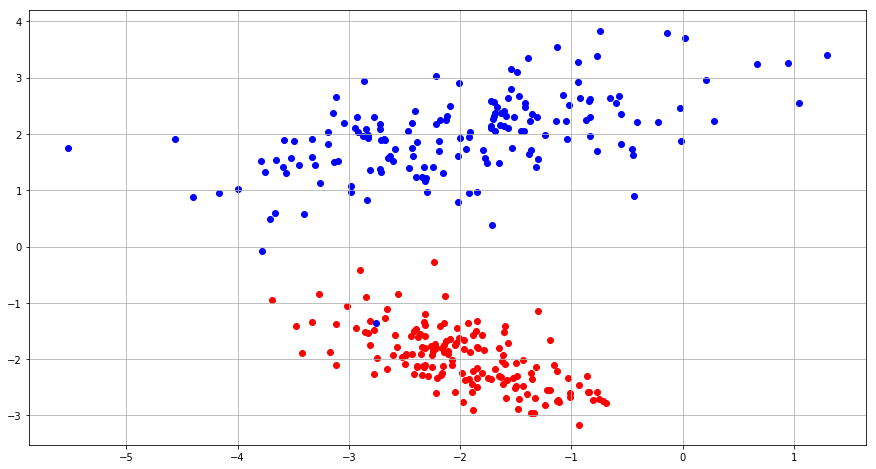

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = 15, 8

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# generar dataset de pruebas (Toy Example)
# Fijamos una semilla para obtener siempre el mismo resultado
seed = 89
np.random.seed(seed)

# Generamos un dataset sintetico con la funcion make_classification de sklearn

X, Y = make_classification(n_samples=400, n_classes=2, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=2.0)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)

x_pos, x_neg = X_train[y_train > 0], X_train[y_train <= 0]    
plt.scatter(x_pos[:, 0], x_pos[:, 1], marker='o', color='r')
plt.scatter(x_neg[:, 0], x_neg[:, 1], marker='o', color='b')    
plt.grid()

Luego, al igual que en el practico anterior, procedemos a escalar los datos llevandolos a una media igual a cero y desviación estandar unitaria.

In [8]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
# Transformo los datos de entrenamiento (Media=0 y Desviación_Estandar=1)
X_train_scaled = scaler.transform(X_train)   

Ahora, con los datos escalados, procedemos a entrenar/fittear un clasificador K-Means:

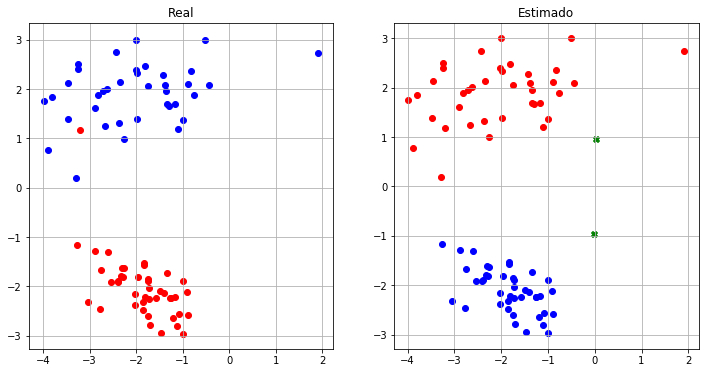

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train_scaled)

y_predict = kmeans.predict(scaler.transform(X_test))

# plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

x_pos, x_neg = X_test[y_test > 0], X_test[y_test <= 0]    
ax1.scatter(x_pos[:, 0], x_pos[:, 1], marker='o', color='r')
ax1.scatter(x_neg[:, 0], x_neg[:, 1], marker='o', color='b') 
ax1.grid()
ax1.set_title("Real")

x_pos, x_neg = X_test[y_predict > 0], X_test[y_predict <= 0]    
ax2.scatter(x_pos[:, 0], x_pos[:, 1], marker='o', color='r')
ax2.scatter(x_neg[:, 0], x_neg[:, 1], marker='o', color='b')  
ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', color='g')
ax2.grid()    
ax2.set_title("Estimado")

plt.show()

In [11]:
from sklearn.metrics import accuracy_score

# Accuracy de KMeans
accuracy_kmeans = accuracy_score(y_test, kmeans.predict(scaler.transform(X_test)))

print('Accuracy KMeans: {}'.format(accuracy_kmeans))

Accuracy KMeans: 0.0125


## Ejercicios
1) Implementar el algoritmo K-Means. Para evaluar el funcionamiento del mismo, usar el dataset sintetico ultilizado previamente con la implementación de K-Means de sklearn.

In [12]:
from scipy.spatial.distance import cdist
from scipy.spatial.distance import euclidean

def k_means(X, k, tol=1e-4, n_iter=50):
    # simple random initialization
    n_samples, n_dim = X.shape
    #centroids = (X.max() - X.min()) * np.random.random((k, n_dim)) + X.min()
    centroids = X[np.random.choice(range(X.shape[0]), size=k, replace=False)]
    
    distortion, prev_distortion = 0., 1e6
    for i in range(n_iter):        
        # 1) Asignación de muestras a centroides:
        # computar una lista (o array) en donde el elemento i-ésimo 
        # corresponda al índice al cluster al cual debe ser asignada 
        # la muestra i-ésima de X. Utilizar la función cdist(XA, XB) 
        # para computar distancias entre dos arreglos XA y XB en donde 
        # muestras están ordenadas por filas.
        #
            
              
        # 2) Actualización de centroides:
        # en base a la lista de asignaciones computada en el paso anterior, 
        # calcular el nuevo valor de cada uno de los centroides. 
        
                
        # 3) Error de cuantización
        # Computar el error de quantización promedio (error de reemplazar 
        # cada muestra por su versión cuantizada). El no decrecimiento de 
        # éste valor será uno de los parámetros que definirán el criterio 
        # de parada del algoritmo.
        # distortion = 
        
        
        if (prev_distortion - distortion) / (prev_distortion + 2**-23) < tol:
            print('done')
            break
        print('iter={}, avg. error={:.3f}'.format(i+1, distortion)) 
        prev_distortion = distortion
            
    return centroids, distortion

def k_means_predict(centroids, X):
    n_samples, n_dim = X.shape
    # Implementar metodo para estimar la pertenencia de un determinado punto X[i] 
    # a uno de los centroides (clusters) definidos previamente. Utilizar la función cdist(XA, XB) 
    # para computar distancias entre dos arreglos XA y XB en donde 
    # muestras están ordenadas por filas.
    
    #prediction = ...
    
    return prediction

2) Probar el algoritmo implementado con el dataset Iris utilizado en el TP_Clasificación_2. Comparar resultados arrojados contra la implementación de K-Means de sklearn.